# House Prices in Monroe Twp, NJ (USA)

**Problem Statement:** Given above data build a machine learning model that can predict home prices based on square feet area

In [23]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("homePrices.csv")
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

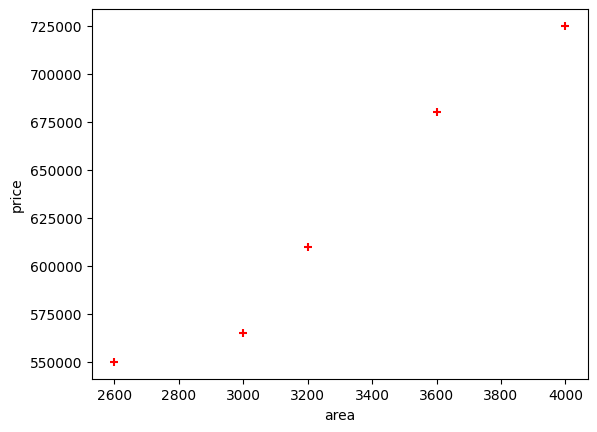

In [25]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')

price column is dropped in the new data frame, why?

In [26]:
new_df = df.drop('price', axis='columns')
new_df

area
0  2600
1  3000
2  3200
3  3600
4  4000

cz the object of 'linear_model' -> fit of this model expects a 2d array(object) 

model is an object of the class linearReg

In [27]:
# Create linear regression object
model = linear_model.LinearRegression()
model

LinearRegression()

In [28]:
model.fit(new_df, df.price)

LinearRegression()

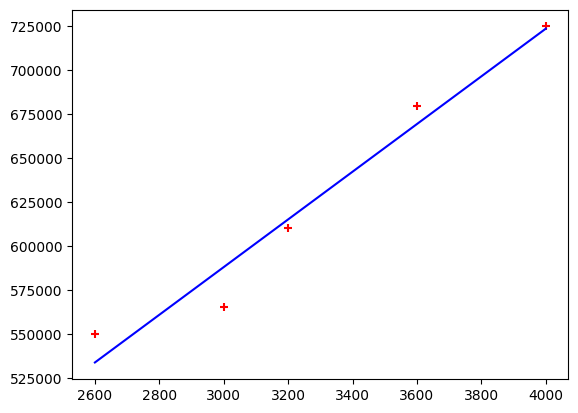

In [29]:
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, model.predict(new_df), color='blue')

(1) Predict price of a home with area = 3300 sqr ft

In [30]:
model.predict([[3300]])

c:\Users\Hp\Documents\GitHub\practice-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

(2) Predict price of a home with area = 5000 sqr ft

In [31]:
model.predict([[5000]])

c:\Users\Hp\Documents\GitHub\practice-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [32]:
print(model.coef_)
print(model.intercept_)

[135.78767123]
180616.43835616432


Generate CSV file with list of home price predictions

In [33]:
area_df = pd.read_csv("areas.csv")
area_df

area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000
11  8600
12  7100

In [34]:
y_pred = model.predict(area_df)

In [35]:
area_df["prices"] = y_pred
area_df

area        prices
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06

In [36]:
area_df.to_csv("predictedPrices.csv")

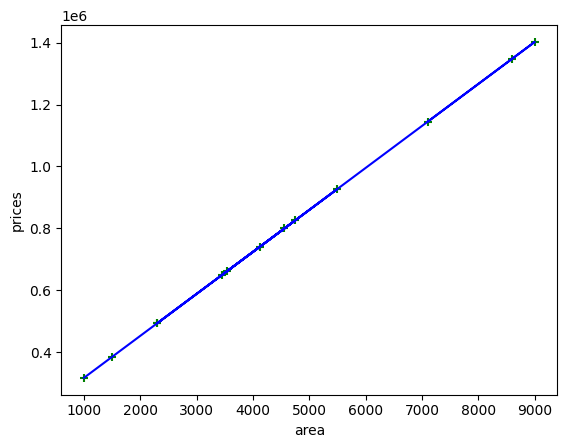

In [37]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(area_df.area, area_df.prices, color='green', marker='+')
plt.plot(area_df.area, y_pred, color='blue')

## exporting/saving model as an file using *Pickle*

In [38]:
import pickle

In [39]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

loading the saved model

In [40]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [41]:
mp.predict([[5000]])

c:\Users\Hp\Documents\GitHub\practice-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

## save model in a file using *Joblib*

why *Joblib*?
- if we have objects containing large numpy arrays -> then its better to use *Joblib* i.e. more efficient

In [44]:
import joblib

In [46]:
# Save the model
joblib.dump(model, 'model_joblib')

['model_joblib']

In [48]:
# Load the model
mj = joblib.load('model_joblib')

mj.predict([[5000]])

c:\Users\Hp\Documents\GitHub\practice-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])